<a href="https://colab.research.google.com/github/Amado-Vazquez/juego_de_pong/blob/master/Arboles_Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Entendiendo los datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score

In [ ]:
plt.style.use('ggplot')

## Census Income Dataset

Datos de la Universidad de California.

<table>
<tr>
    <th>Columns</th>
    <th>Descriptions</th>
</tr>
<tr>
    <td>age</td>
    <td> Age of the Person</td>
</tr>
<tr>
    <td>workclass</td>
    <td>The type of employment of the person</td>
</tr>
<tr>
    <td>education</td>
    <td>Education level of the person</td>
</tr>
<tr>
    <td>marital_status</td>
    <td>If the person if married or not</td>
</tr>
<tr>
    <td>Occupation</td>
    <td>What type of jobs does the person do</td>
</tr>
<tr>
    <td>relationship</td>
    <td>Type of relationship of the person</td>
</tr>
<tr>
    <td>race</td>
    <td>Ethinicity of the person</td>
</tr>
<tr>
    <td>gender</td>
    <td>Gender of the person </td>
</tr>
<tr>
    <td>hours_per_week</td>
    <td>Average hours worked per week</td>
</tr>
<tr>
    <td>native_country</td>
    <td>Country of origin</td>
</tr>
<tr>
    <td>greater_than_50k</td>
    <td>Flag which indicates if the person is earning more than 50K dollars in a year</td>
</tr>
</table>

Cargamos los datos

In [ ]:
data = pd.read_csv('census.csv')
data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0


Veamos el nivel de poblamiento de las variables

In [ ]:
data.count(0)/data.shape[0] * 100

age                 100.000000
workclass            94.361179
education           100.000000
education_num       100.000000
marital_status      100.000000
occupation           94.339681
relationship        100.000000
race                100.000000
gender              100.000000
hours_per_week      100.000000
native_country       98.209459
greater_than_50k    100.000000
dtype: float64

Eliminamos variable duplicada

In [ ]:
del data['education_num']

Exploramos los datos y entendemos ciertos patrones existentes.

<strong>Hipótesis 1: Personas mayores, ganan más.</strong>


In [ ]:
# El grupo de personas que ganan más de 50K.
data[data.greater_than_50k == 1].head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,1
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,1
9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1
10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,1
11,30,State-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,40,India,1


In [ ]:
data[data.greater_than_50k == 1].age.values

array([52, 31, 42, ..., 53, 40, 52], dtype=int64)

Text(0, 0.5, 'Frecuencia')

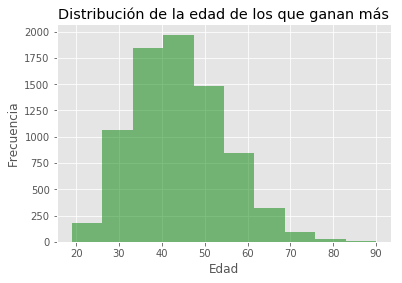

In [ ]:
hist_above_50 = plt.hist(data[data.greater_than_50k == 1].age.values, 10, facecolor='green', alpha=0.5)
plt.title('Distribución de la edad de los que ganan más')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

Los que ganan más, se concentran entre los 35 a 55 años.

Y en los que ganan menos

Text(0, 0.5, 'Frecuencia')

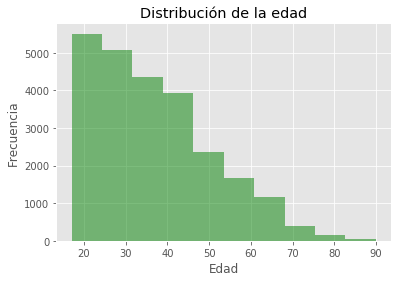

In [ ]:
hist_below_50 = plt.hist(data[data.greater_than_50k == 0].age.values, 10, facecolor='green', alpha=0.5)
plt.title('Distribución de la edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

Los que ganen menos se concentran entre los 20 y 30 años.

<strong>Hipótesis 2: Ingresos varían dependiendo del tipo de empleo </strong>

In [ ]:
data[data.greater_than_50k == 1].groupby('workclass').workclass.count()

workclass
 Federal-gov          371
 Local-gov            617
 Private             4963
 Self-emp-inc         622
 Self-emp-not-inc     724
 State-gov            353
Name: workclass, dtype: int64

In [ ]:
data[data.greater_than_50k == 0].groupby('workclass').workclass.count()

workclass
 Federal-gov           589
 Local-gov            1476
 Never-worked            7
 Private             17732
 Self-emp-inc          494
 Self-emp-not-inc     1817
 State-gov             945
 Without-pay            14
Name: workclass, dtype: int64

In [ ]:
#workclass='Federal-gov'
#workclass='Local-gov'

In [ ]:
dist_data = pd.concat([data[data.greater_than_50k == 1].groupby('workclass').workclass.count()
                          , data[data.greater_than_50k == 0].groupby('workclass').workclass.count()], axis=1)

dist_data.columns = ['wk_class_gt50','wk_class_lt50']

dist_data

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,wk_class_gt50,wk_class_lt50
Federal-gov,371.0,589
Local-gov,617.0,1476
Never-worked,NaN,7
Private,4963.0,17732
Self-emp-inc,622.0,494
Self-emp-not-inc,724.0,1817
State-gov,353.0,945
Without-pay,NaN,14


In [ ]:
dist_data_final = dist_data.wk_class_gt50 / (dist_data.wk_class_lt50 + dist_data.wk_class_gt50 )
dist_data_final

 Federal-gov         0.386458
 Local-gov           0.294792
 Never-worked             NaN
 Private             0.218683
 Self-emp-inc        0.557348
 Self-emp-not-inc    0.284927
 State-gov           0.271957
 Without-pay              NaN
dtype: float64

In [ ]:
dist_data_final.sort_values(ascending=False)

 Self-emp-inc        0.557348
 Federal-gov         0.386458
 Local-gov           0.294792
 Self-emp-not-inc    0.284927
 State-gov           0.271957
 Private             0.218683
 Never-worked             NaN
 Without-pay              NaN
dtype: float64

Text(0, 0.5, '% de personas')

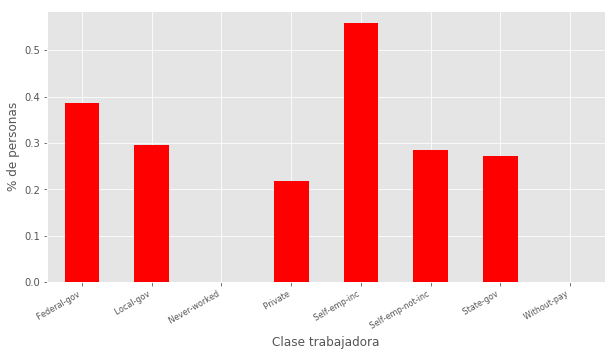

In [ ]:
plt.figure(figsize=(10,5))
ax = dist_data_final.plot(kind = 'bar', color = 'r', y='Percentage')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Clase trabajadora')
ax.set_ylabel('% de personas')

Personas laboralmente independientes con empresa son los que ganan más, seguidos por los empleados de gobiernos federales.

<strong>Hipótesis 3: Personas con más educación ganan más</strong>

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Text(0, 0.5, '% de Personas')

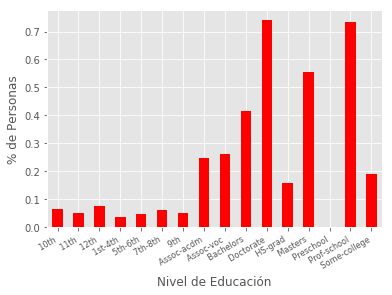

In [ ]:
dist_data = pd.concat([data[data.greater_than_50k == 1].groupby('education').education.count()
                          , data[data.greater_than_50k == 0].groupby('education').education.count()], axis=1)

dist_data.columns = ['education_gt50','education_lt50']

dist_data_final = dist_data.education_gt50 / (dist_data.education_gt50 + dist_data.education_lt50 )

#dist_data_final.sort(ascending = False)
ax =dist_data_final.plot(kind = 'bar', color = 'r')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Nivel de Educación')
ax.set_ylabel('% de Personas')

A mayor educación, mayores ingresos.

<strong>Hipótesis 4: Las personas casadas suelen ganar más</strong>

Text(0, 0.5, '% de personas')

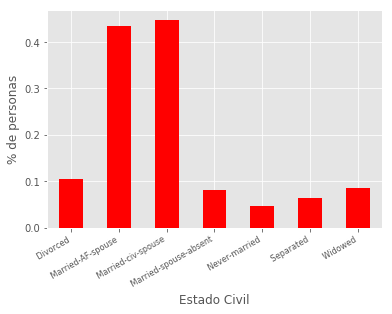

In [ ]:
dist_data = pd.concat([data[data.greater_than_50k == 1].groupby('marital_status').marital_status.count()
                          , data[data.greater_than_50k == 0].groupby('marital_status').marital_status.count()], axis=1)

dist_data.columns = ['marital_status_gt50','marital_status_lt50']

dist_data_final = dist_data.marital_status_gt50 / (dist_data.marital_status_gt50 + dist_data.marital_status_lt50 )

ax = dist_data_final.plot(kind = 'bar', color = 'r')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Estado Civil')
ax.set_ylabel('% de personas')

Las personas casadas tienden a ganar más.

<strong>Hipótesis 5: Los ingresos dependen de la ocupación </strong>

Text(0, 0.5, '% de Personas')

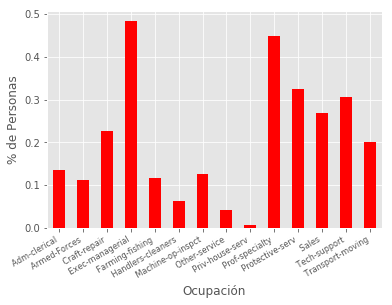

In [ ]:
dist_data = pd.concat([data[data.greater_than_50k == 1].groupby('occupation').occupation.count()
                          , data[data.greater_than_50k == 0].groupby('occupation').occupation.count()], axis=1)

dist_data.columns = ['occupation_gt50','occupation_lt50']

dist_data_final = dist_data.occupation_gt50 / (dist_data.occupation_gt50 + dist_data.occupation_lt50 )

ax = dist_data_final.plot(kind = 'bar', color = 'r')

ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Ocupación')
ax.set_ylabel('% de Personas')

<strong>Hipótesis 6: Hombres ganan más</strong>

Text(0, 0.5, '% de Personas')

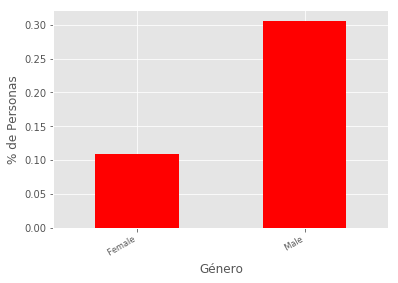

In [ ]:
dist_data = pd.concat([data[data.greater_than_50k == 1].groupby('gender').gender.count()
                          , data[data.greater_than_50k == 0].groupby('gender').gender.count()], axis=1)

dist_data.columns = ['gender_gt50','gender_lt50']

dist_data_final = dist_data.gender_gt50 / (dist_data.gender_gt50 + dist_data.gender_lt50 )

ax = dist_data_final.plot(kind = 'bar', color = 'r')

ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Género')
ax.set_ylabel('% de Personas')

<strong>Hipótesis 9: Ingresos por país de origen</strong>

Text(0, 0.5, '% de Personas')

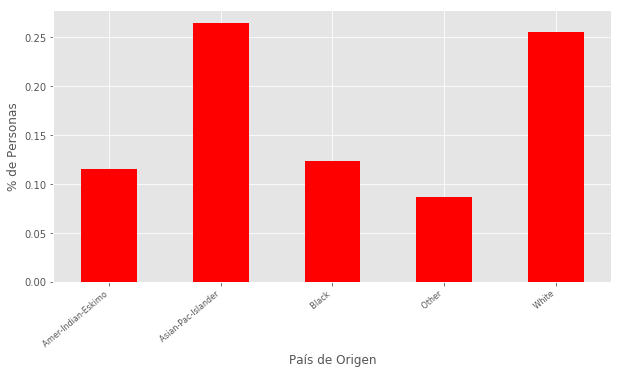

In [ ]:
plt.figure(figsize=(10,5))
dist_data = pd.concat([data[data.greater_than_50k == 1].groupby('race').native_country.count()
                          , data[data.greater_than_50k == 0].groupby('race').native_country.count()], axis=1)

dist_data.columns = ['native_country_gt50','native_country_lt50']

dist_data_final = dist_data.native_country_gt50 / (dist_data.native_country_gt50 + dist_data.native_country_lt50 )

ax = dist_data_final.plot(kind = 'bar', color = 'r')

ax.set_xticklabels(dist_data_final.index, rotation=40, fontsize=8, ha='right')
ax.set_xlabel('País de Origen')
ax.set_ylabel('% de Personas')

Las personas de Francia, India, Iran y Taiwan son los de mayores ingresos.

## Decision Trees

Usaremos los árboles de decisión para entender el perfil de aquellos que ganan más de $50K anuales.

In [ ]:
data.shape

(32560, 11)

In [ ]:
data.columns

Index(['age', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'hours_per_week', 'native_country',
       'greater_than_50k'],
      dtype='object')

In [ ]:
data.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0


In [ ]:
data.groupby('workclass').workclass.count()

workclass
 Federal-gov           960
 Local-gov            2093
 Never-worked            7
 Private             22695
 Self-emp-inc         1116
 Self-emp-not-inc     2541
 State-gov            1298
 Without-pay            14
Name: workclass, dtype: int64

In [ ]:
# create a DataFrame of dummy variables for workclass
workclass_dummies = pd.get_dummies(data.workclass, prefix='Wkc_')
workclass_dummies.head()

,Wkc__ Federal-gov,Wkc__ Local-gov,Wkc__ Never-worked,Wkc__ Private,Wkc__ Self-emp-inc,Wkc__ Self-emp-not-inc,Wkc__ State-gov,Wkc__ Without-pay
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0


In [ ]:
workclass_dummies.drop(workclass_dummies.columns[0],axis=1,inplace=True)
workclass_dummies.head()

,Wkc__ Local-gov,Wkc__ Never-worked,Wkc__ Private,Wkc__ Self-emp-inc,Wkc__ Self-emp-not-inc,Wkc__ State-gov,Wkc__ Without-pay
0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [ ]:
# concatenate the original DataFrame and the dummy DataFrame
data_census0 = pd.concat([data,workclass_dummies], axis=1)
data_census0.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k,Wkc__ Local-gov,Wkc__ Never-worked,Wkc__ Private,Wkc__ Self-emp-inc,Wkc__ Self-emp-not-inc,Wkc__ State-gov,Wkc__ Without-pay
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0,0,0,0,0,0,1,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,0,0,0,0,1,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,0,0,1,0,0,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,0,0,1,0,0,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,0,0,1,0,0,0,0


In [ ]:
# create a DataFrame of dummy variables for education
educ_dummies = pd.get_dummies(data.education, prefix='educ_')
educ_dummies.drop(educ_dummies.columns[0],axis=1,inplace=True)
educ_dummies.head()

,educ__ 11th,educ__ 12th,educ__ 1st-4th,educ__ 5th-6th,educ__ 7th-8th,educ__ 9th,educ__ Assoc-acdm,educ__ Assoc-voc,educ__ Bachelors,educ__ Doctorate,educ__ HS-grad,educ__ Masters,educ__ Preschool,educ__ Prof-school,educ__ Some-college
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# concatenate the original DataFrame and the dummy DataFrame
data_census1 = pd.concat([data_census0,educ_dummies], axis=1)
data_census1.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,...,educ__ 9th,educ__ Assoc-acdm,educ__ Assoc-voc,educ__ Bachelors,educ__ Doctorate,educ__ HS-grad,educ__ Masters,educ__ Preschool,educ__ Prof-school,educ__ Some-college
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,...,0,0,0,1,0,0,0,0,0,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,...,0,0,0,1,0,0,0,0,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,...,0,0,0,0,0,1,0,0,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,...,0,0,0,0,0,0,0,0,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# create a DataFrame of dummy variables for marital_status
ms_dummies = pd.get_dummies(data.marital_status, prefix='ms_')
ms_dummies.drop(ms_dummies.columns[0],axis=1,inplace=True)
ms_dummies.head()

,ms__ Married-AF-spouse,ms__ Married-civ-spouse,ms__ Married-spouse-absent,ms__ Never-married,ms__ Separated,ms__ Widowed
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,0,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [ ]:
# concatenate the original DataFrame and the dummy DataFrame
data_census2 = pd.concat([data_census1,ms_dummies], axis=1)
data_census2.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,...,educ__ Masters,educ__ Preschool,educ__ Prof-school,educ__ Some-college,ms__ Married-AF-spouse,ms__ Married-civ-spouse,ms__ Married-spouse-absent,ms__ Never-married,ms__ Separated,ms__ Widowed
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,...,0,0,0,0,0,0,0,1,0,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,...,0,0,0,0,0,1,0,0,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,...,0,0,0,0,0,0,0,0,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,...,0,0,0,0,0,1,0,0,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# create a DataFrame of dummy variables for occupation
oc_dummies = pd.get_dummies(data.occupation, prefix='oc_')
oc_dummies.drop(oc_dummies.columns[0],axis=1,inplace=True)
oc_dummies.head()

,oc__ Armed-Forces,oc__ Craft-repair,oc__ Exec-managerial,oc__ Farming-fishing,oc__ Handlers-cleaners,oc__ Machine-op-inspct,oc__ Other-service,oc__ Priv-house-serv,oc__ Prof-specialty,oc__ Protective-serv,oc__ Sales,oc__ Tech-support,oc__ Transport-moving
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# concatenate the original DataFrame and the dummy DataFrame
data_census3 = pd.concat([data_census2,oc_dummies], axis=1)
data_census3.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,...,oc__ Farming-fishing,oc__ Handlers-cleaners,oc__ Machine-op-inspct,oc__ Other-service,oc__ Priv-house-serv,oc__ Prof-specialty,oc__ Protective-serv,oc__ Sales,oc__ Tech-support,oc__ Transport-moving
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,...,0,0,0,0,0,0,0,0,0,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,...,0,0,0,0,0,0,0,0,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,...,0,1,0,0,0,0,0,0,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,...,0,1,0,0,0,0,0,0,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# create a DataFrame of dummy variables for relationship
rs_dummies = pd.get_dummies(data.relationship, prefix='rs_')
rs_dummies.drop(rs_dummies.columns[0],axis=1,inplace=True)
rs_dummies.head()

,rs__ Not-in-family,rs__ Other-relative,rs__ Own-child,rs__ Unmarried,rs__ Wife
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
# concatenate the original DataFrame and the dummy DataFrame
data_census4 = pd.concat([data_census3,rs_dummies], axis=1)
data_census4.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,...,oc__ Prof-specialty,oc__ Protective-serv,oc__ Sales,oc__ Tech-support,oc__ Transport-moving,rs__ Not-in-family,rs__ Other-relative,rs__ Own-child,rs__ Unmarried,rs__ Wife
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,...,0,0,0,0,0,1,0,0,0,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,...,0,0,0,0,0,0,0,0,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,...,0,0,0,0,0,1,0,0,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,...,0,0,0,0,0,0,0,0,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
# create a DataFrame of dummy variables for race
race_dummies = pd.get_dummies(data.race, prefix='race_')
race_dummies.drop(race_dummies.columns[0],axis=1,inplace=True)
race_dummies.head()

,race__ Asian-Pac-Islander,race__ Black,race__ Other,race__ White
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


In [ ]:
# concatenate the original DataFrame and the dummy DataFrame
data_census5 = pd.concat([data_census4,race_dummies], axis=1)
data_census5.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,...,oc__ Transport-moving,rs__ Not-in-family,rs__ Other-relative,rs__ Own-child,rs__ Unmarried,rs__ Wife,race__ Asian-Pac-Islander,race__ Black,race__ Other,race__ White
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,...,0,1,0,0,0,0,0,0,0,1
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,...,0,0,0,0,0,0,0,0,0,1
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,...,0,1,0,0,0,0,0,0,0,1
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
# create a DataFrame of dummy variables for gender
gender_dummies = pd.get_dummies(data.gender, prefix='gender_')
gender_dummies.drop(gender_dummies.columns[0],axis=1,inplace=True)
gender_dummies.head()

,gender__ Male
0,1
1,1
2,1
3,1
4,0


In [ ]:
# concatenate the original DataFrame and the dummy DataFrame
data_census6 = pd.concat([data_census5,gender_dummies], axis=1)
data_census6.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,...,rs__ Not-in-family,rs__ Other-relative,rs__ Own-child,rs__ Unmarried,rs__ Wife,race__ Asian-Pac-Islander,race__ Black,race__ Other,race__ White,gender__ Male
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,...,1,0,0,0,0,0,0,0,1,1
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,...,0,0,0,0,0,0,0,0,1,1
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,...,1,0,0,0,0,0,0,0,1,1
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,...,0,0,0,0,0,0,1,0,0,1
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
# create a DataFrame of dummy variables for country
country_dummies = pd.get_dummies(data.native_country, prefix='nc_')
country_dummies.drop(country_dummies.columns[0],axis=1,inplace=True)
country_dummies.head()

,nc__ Canada,nc__ China,nc__ Columbia,nc__ Cuba,nc__ Dominican-Republic,nc__ Ecuador,nc__ El-Salvador,nc__ England,nc__ France,nc__ Germany,...,nc__ Portugal,nc__ Puerto-Rico,nc__ Scotland,nc__ South,nc__ Taiwan,nc__ Thailand,nc__ Trinadad&Tobago,nc__ United-States,nc__ Vietnam,nc__ Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# concatenate the original DataFrame and the dummy DataFrame
data_census7 = pd.concat([data_census6,country_dummies], axis=1)
data_census7.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,...,nc__ Portugal,nc__ Puerto-Rico,nc__ Scotland,nc__ South,nc__ Taiwan,nc__ Thailand,nc__ Trinadad&Tobago,nc__ United-States,nc__ Vietnam,nc__ Yugoslavia
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,...,0,0,0,0,0,0,0,1,0,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,...,0,0,0,0,0,0,0,1,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,...,0,0,0,0,0,0,0,1,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_census7.columns.values

array(['age', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'hours_per_week',
       'native_country', 'greater_than_50k', 'Wkc__ Local-gov',
       'Wkc__ Never-worked', 'Wkc__ Private', 'Wkc__ Self-emp-inc',
       'Wkc__ Self-emp-not-inc', 'Wkc__ State-gov', 'Wkc__ Without-pay',
       'educ__ 11th', 'educ__ 12th', 'educ__ 1st-4th', 'educ__ 5th-6th',
       'educ__ 7th-8th', 'educ__ 9th', 'educ__ Assoc-acdm',
       'educ__ Assoc-voc', 'educ__ Bachelors', 'educ__ Doctorate',
       'educ__ HS-grad', 'educ__ Masters', 'educ__ Preschool',
       'educ__ Prof-school', 'educ__ Some-college',
       'ms__ Married-AF-spouse', 'ms__ Married-civ-spouse',
       'ms__ Married-spouse-absent', 'ms__ Never-married',
       'ms__ Separated', 'ms__ Widowed', 'oc__ Armed-Forces',
       'oc__ Craft-repair', 'oc__ Exec-managerial',
       'oc__ Farming-fishing', 'oc__ Handlers-cleaners',
       'oc__ Machine-op-inspct', 'oc__ Other-service',
    

In [ ]:
features = ['age','hours_per_week',
       'Wkc__ Local-gov', 'Wkc__ Never-worked', 'Wkc__ Private',
       'Wkc__ Self-emp-inc', 'Wkc__ Self-emp-not-inc', 'Wkc__ State-gov',
       'Wkc__ Without-pay', 'educ__ 11th', 'educ__ 12th', 'educ__ 1st-4th',
       'educ__ 5th-6th', 'educ__ 7th-8th', 'educ__ 9th', 'educ__ Assoc-acdm',
       'educ__ Assoc-voc', 'educ__ Bachelors', 'educ__ Doctorate',
       'educ__ HS-grad', 'educ__ Masters', 'educ__ Preschool',
       'educ__ Prof-school', 'educ__ Some-college', 'ms__ Married-AF-spouse',
       'ms__ Married-civ-spouse', 'ms__ Married-spouse-absent',
       'ms__ Never-married', 'ms__ Separated', 'ms__ Widowed',
       'oc__ Armed-Forces', 'oc__ Craft-repair', 'oc__ Exec-managerial',
       'oc__ Farming-fishing', 'oc__ Handlers-cleaners',
       'oc__ Machine-op-inspct', 'oc__ Other-service', 'oc__ Priv-house-serv',
       'oc__ Prof-specialty', 'oc__ Protective-serv', 'oc__ Sales',
       'oc__ Tech-support', 'oc__ Transport-moving', 'rs__ Not-in-family',
       'rs__ Other-relative', 'rs__ Own-child', 'rs__ Unmarried', 'rs__ Wife',
       'race__ Asian-Pac-Islander', 'race__ Black', 'race__ Other',
       'race__ White', 'gender__ Male', 'nc__ Canada', 'nc__ China',
       'nc__ Columbia', 'nc__ Cuba', 'nc__ Dominican-Republic', 'nc__ Ecuador',
       'nc__ El-Salvador', 'nc__ England', 'nc__ France', 'nc__ Germany',
       'nc__ Greece', 'nc__ Guatemala', 'nc__ Haiti', 'nc__ Honduras',
       'nc__ Hong', 'nc__ Hungary', 'nc__ India', 'nc__ Iran', 'nc__ Ireland',
       'nc__ Italy', 'nc__ Jamaica', 'nc__ Japan', 'nc__ Laos', 'nc__ Mexico',
       'nc__ Nicaragua', 'nc__ Outlying-US(Guam-USVI-etc)', 'nc__ Peru',
       'nc__ Philippines', 'nc__ Poland', 'nc__ Portugal', 'nc__ Puerto-Rico',
       'nc__ Scotland', 'nc__ South', 'nc__ Taiwan', 'nc__ Thailand',
       'nc__ Trinadad&Tobago', 'nc__ United-States', 'nc__ Vietnam',
       'nc__ Yugoslavia']

In [ ]:
X = data_census7[features].values
X

array([[39, 40,  0, ...,  1,  0,  0],
       [50, 13,  0, ...,  1,  0,  0],
       [38, 40,  0, ...,  1,  0,  0],
       ...,
       [58, 40,  0, ...,  1,  0,  0],
       [22, 20,  0, ...,  1,  0,  0],
       [52, 40,  0, ...,  1,  0,  0]], dtype=int64)

In [ ]:
y = data_census7['greater_than_50k'].values
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [ ]:
X_train

array([[28, 40,  0, ...,  1,  0,  0],
       [46, 38,  0, ...,  1,  0,  0],
       [56, 15,  0, ...,  1,  0,  0],
       ...,
       [32, 50,  0, ...,  0,  0,  0],
       [23, 36,  0, ...,  0,  0,  0],
       [35, 40,  0, ...,  1,  0,  0]], dtype=int64)

In [ ]:
y_train

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

## Arbol de Decision

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [ ]:
feat_importance=pd.DataFrame({'feature':features, 'importance':clf_gini.feature_importances_})

In [ ]:
clf_gini.feature_importances_

array([0.02418128, 0.04802307, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.10786365, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.71714959, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.10278242, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
feat_importance.sort_values('importance',ascending=False).head()

,feature,importance
25,ms__ Married-civ-spouse,0.717150
17,educ__ Bachelors,0.107864
38,oc__ Prof-specialty,0.102782
1,hours_per_week,0.048023
0,age,0.024181


In [ ]:
feat_importance.to_csv('features_importance.csv')

In [ ]:
with open("tree_income.txt", "w") as f:
    f = export_graphviz(clf_gini, out_file=f,feature_names=features)

In [ ]:
y_pred = clf_gini.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Veamos como performa el modelo

In [ ]:
accuracy_score(y_test,y_pred)*100

81.1015561015561

### Matriz de Confusión y otros indicadores

In [ ]:
pd.crosstab(y_test,y_pred
                  ,rownames = ['Real']
                  ,colnames = ['Predicho'])

Predicho,0,1
Real,,
0,7100,346
1,1500,822


### Accuracy

In [ ]:
(7100+822)/(1500+822+7100+346)

0.811015561015561

### Recall

In [ ]:
822/(1500+822)

0.35400516795865633

### Precision

In [ ]:
822/(346+822)

0.7037671232876712

### F1 Score

In [ ]:
2*(0.7*0.35)/(0.7+0.35)

0.4666666666666667

### Measure of the model

In [ ]:
print ('\n \n')

print (classification_report(y_test,y_pred))


 

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      7446
           1       0.70      0.35      0.47      2322

   micro avg       0.81      0.81      0.81      9768
   macro avg       0.76      0.65      0.68      9768
weighted avg       0.80      0.81      0.79      9768



### Otro Árbol

In [ ]:
clf_gini_2 = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=11, min_samples_leaf=59)

clf_gini_2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=59, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [ ]:
feat_importance_2=pd.DataFrame({'feature':features, 'importance':clf_gini_2.feature_importances_})

In [ ]:
clf_gini_2.feature_importances_

array([7.74655328e-02, 6.20521659e-02, 7.61904531e-06, 0.00000000e+00,
       2.83060270e-03, 0.00000000e+00, 7.88597728e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.40751633e-03, 0.00000000e+00, 0.00000000e+00,
       1.52637180e-03, 8.52384802e-02, 3.93320084e-03, 2.09799736e-03,
       1.84150015e-02, 0.00000000e+00, 5.01763004e-03, 2.43195625e-03,
       0.00000000e+00, 5.20221442e-01, 0.00000000e+00, 6.51465872e-05,
       7.42516975e-06, 0.00000000e+00, 0.00000000e+00, 3.93372450e-04,
       7.02326777e-02, 7.56738224e-03, 0.00000000e+00, 5.48607211e-06,
       8.98439292e-03, 0.00000000e+00, 9.35865510e-02, 0.00000000e+00,
       6.97637509e-03, 6.90340243e-03, 1.04712434e-04, 1.01725065e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.66113546e-03,
       6.66893142e-06, 1.28884245e-04, 0.00000000e+00, 0.00000000e+00,
       5.82764212e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [ ]:
feat_importance_2.sort_values('importance',ascending=False).head()

,feature,importance
25,ms__ Married-civ-spouse,0.520221
38,oc__ Prof-specialty,0.093587
17,educ__ Bachelors,0.085238
0,age,0.077466
32,oc__ Exec-managerial,0.070233


In [ ]:
feat_importance_2.to_csv('features_importance.csv')

In [ ]:
with open("ruta/tree_income.txt", "w") as f:
    f = export_graphviz(clf_gini_2, out_file=f,feature_names=features)

In [ ]:
y_pred_2 = clf_gini_2.predict(X_test)
y_pred_2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Veamos como performa el modelo

In [ ]:
accuracy_score(y_test,y_pred_2)*100

82.89312039312038

### Matriz de Confusión y otros indicadores

In [ ]:
pd.crosstab(y_test,y_pred_2
                  ,rownames = ['Real']
                  ,colnames = ['Predicho'])

Predicho,0,1
Real,,
0,6915,531
1,1140,1182


### Measure of the model

In [ ]:
print ('\n \n')

print (classification_report(y_test,y_pred))


 

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      7446
           1       0.70      0.35      0.47      2322

   micro avg       0.81      0.81      0.81      9768
   macro avg       0.76      0.65      0.68      9768
weighted avg       0.80      0.81      0.79      9768



In [ ]:
print ('\n \n')

print (classification_report(y_test,y_pred_2))


 

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      7446
           1       0.69      0.51      0.59      2322

   micro avg       0.83      0.83      0.83      9768
   macro avg       0.77      0.72      0.74      9768
weighted avg       0.82      0.83      0.82      9768

